<a href="https://colab.research.google.com/github/hcgalvantech/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar una framework de al menos 100 filas con datos random con  apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import random
import pandas as pd

# Listas de apellidos y nombres
apellidos = ["Gonzalez", "Rodriguez", "Perez", "Gomez", "Fernandez", "Lopez", "Martinez", "Sanchez", "Romero", "Diaz"]
nombres = ["Juan", "Maria", "Jose", "Laura", "Carlos", "Ana", "Pedro", "Sofia", "Diego", "Valentina"]

# Lista de materias de educación secundaria
materias = ["Matemáticas", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología", "Artes"]


# Función para generar datos aleatorios para un alumno
def generar_datos_alumno():
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  datos_alumno = []
  for _ in range(10):  # Generar datos para 10 materias
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 15)
    datos_alumno.append([materia, nota1, nota2, nota3, faltas])
  return apellido, nombre, dni, datos_alumno


# Crear lista para almacenar los datos de todos los alumnos
datos_alumnos = []

# Generar datos para al menos 100 filas
for _ in range(100):
  apellido, nombre, dni, datos_materia = generar_datos_alumno()
  for materia_data in datos_materia:
    datos_alumnos.append([apellido, nombre, dni] + materia_data)


# Crear DataFrame de Pandas
df = pd.DataFrame(datos_alumnos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

# Puedes guardar el DataFrame en un archivo CSV si lo deseas
# df.to_csv("datos_alumnos.csv", index=False)


,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gomez,Laura,13294631,Música,8,2,7,0
1,Sanchez,Juan,17397369,Educación Física,3,7,5,13
2,Garcia,Maria,48490339,Música,3,1,2,15
3,Romero,Maria,36226846,Inglés,10,6,1,15
4,Gonzalez,Pedro,23746193,Artes,1,7,8,11
...,...,...,...,...,...,...,...,...
95,Gomez,Sofia,18556097,Ciencias Naturales,7,4,8,14
96,Lopez,Carlos,32337100,Educación Física,9,7,5,10
97,Rodriguez,Ana,30144888,Ciencias Naturales,7,3,9,13
98,Gonzalez,Carlos,10841346,Educación Física,6,9,9,4


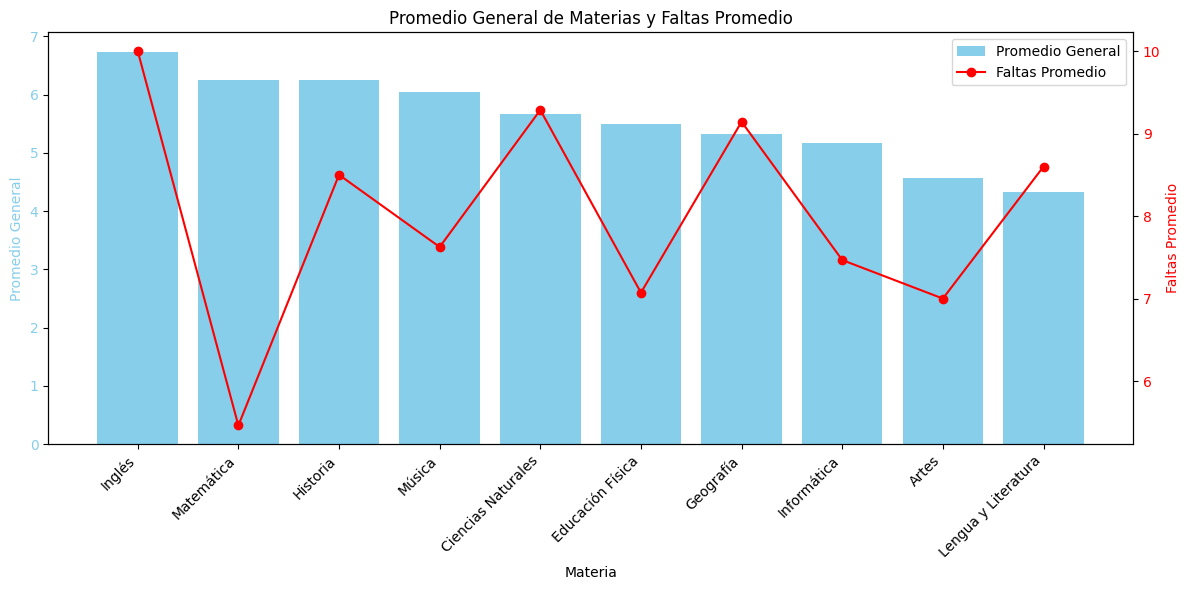

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación

import matplotlib.pyplot as plt
import pandas as pd

# ... (Tu código para generar el DataFrame df) ...

# Calcular el promedio general de cada materia
promedios_materias = df.groupby("Materia Escolar").agg({"Nota 1er Trimestre": "mean", "Nota 2do Trimestre": "mean", "Nota 3er Trimestre": "mean", "Faltas a clases": "mean"})
promedios_materias["Promedio General"] = (promedios_materias["Nota 1er Trimestre"] + promedios_materias["Nota 2do Trimestre"] + promedios_materias["Nota 3er Trimestre"]) / 3
promedios_materias = promedios_materias.sort_values("Promedio General", ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio general
ax1.bar(promedios_materias.index, promedios_materias["Promedio General"], color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia")
ax1.set_ylabel("Promedio General", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
plt.xticks(rotation=45, ha="right")

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(promedios_materias.index, promedios_materias["Faltas a clases"], color="red", marker="o", label="Faltas Promedio")
ax2.set_ylabel("Faltas Promedio", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

# Título del gráfico
plt.title("Promedio General de Materias y Faltas Promedio")

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()